# Introduction
In the code snippet, we have imported necessary libraries such as **pandas, numpy, matplotlib, and scikit-learn**. Then, we have used the functions from these libraries to perform data preprocessing and build a logistic regression model.

Specifically, we have used pandas to load and manipulate data, numpy for numerical operations, matplotlib for data visualization, and scikit-learn for data preprocessing and model building. We have split the data into training and testing sets using train_test_split function, applied StandardScaler for feature scaling, and OneHotEncoder for one-hot encoding categorical variables.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from PIL import Image


The code defines two variables named filename1 and filename2 with the values 'train.csv' and 'test.csv', respectively.
It imports the sys module so it prints the values of filename1 and filename2.
It imports the files module from the google.colab package.
It calls the files.upload() function to open a dialog box that allows us choose a file to upload. 

In [ ]:
filename1 = 'train.csv'
filename2 = 'test.csv'
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    print("Upload in Colab ",filename1, filename2)
    from google.colab import files
    # if you are running in Colab, the line below will open a dialog
    # then you must choose 'foo.csv' in your local filesystem
    uploaded = files.upload()
    # now 'foo.csv' is available in your Colab environment

Upload in Colab  train.csv test.csv


Saving test.csv to test.csv
Saving train.csv to train.csv


In these two lines of code, we are loading the **training and testing datasets into pandas dataframes**. The data is being read from csv files, where the file names are 'train.csv' and 'test.csv'.

Once loaded, the training data is stored in the 'train' dataframe and the testing data is stored in the 'test' dataframe. We can now use these dataframes to perform further data preprocessing and model building.

In [ ]:
# Load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

The code is used to print out the dimensions of the train and test datasets in Python. Here's what it does:

- Train and test are assumed to be variables that hold the datasets  working with.

-Train.shape and test.shape are attributes of the train and test datasets, respectively, that return a tuple representing the dimensions of the datasets.

The code uses string formatting to print out the dimensions of the datasets in a human-readable format. The first line of code prints the dimension of the train set using train.shape, and the second line of code prints the dimension of the test set using test.shape.

The output of these two print statements will be two lines of text indicating the dimensions of the train and test datasets, respectively, in the following format:

"The dimension of the train set is (x, y)", where x is the number of rows in the train dataset, and y is the number of columns in the train dataset.
"The dimension of the test set is (a, b)", where a is the number of rows in the test dataset, and b is the number of columns in the test dataset.


Everything aiming to understand the size of the datasets and how they are structured.

In [ ]:
#visualize the shape od tha data
print("The dimension of the train set is {}".format(train.shape))

print("The dimension of the test set is {}".format(test.shape))


The dimension of the train set is (42000, 785)
The dimension of the test set is (28000, 784)


The **train.head() function** displays the first 5 rows of the training dataset. This is a quick way to get an idea of what the data looks like and what features it contains. The output will show the column names and the first few rows of data in tabular form.

In [ ]:
#visualize train set
train.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The **test.head() function** displays the first 5 rows of the testing dataset. This is a quick way to get an idea of what the data looks like and what features it contains. The output will show the column names and the first few rows of data in tabular form.

Note that the testing dataset does not have a 'label' column, since the goal is to predict the labels for the testing data using a trained machine learning model.

In [ ]:
#visualize test set
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In this line of code, we are splitting the training data into a training set and a validation set. This is done using the train_test_split function from scikit-learn.

The input arguments to the function are:

    train.drop('label', axis=1): this is the training data without the 'label' column, which we want to predict.
    train['label']: this is the target variable we want to predict, which is the 'label' column in the training data.
    test_size=0.2: this is the proportion of the data to be used for validation, which is 20% of the data.
    random_state=42: this is a random seed used to ensure that the split is reproducible.

The function returns four dataframes:

    X_train: this is the training set without the 'label' column.
    X_val: this is the validation set without the 'label' column.
    y_train: this is the target variable for the training set.
    y_val: this is the target variable for the validation set.

We will use these dataframes to fit and evaluate our machine learning model.

In [ ]:
# Split the data into a training set and a validation set
X_train, X_val, y_train, y_val = train_test_split(train.drop('label', axis=1), train['label'], test_size=0.2, random_state=42)


The **print(X_train)** function displays the contents of the X_train dataframe. This dataframe contains the features of the training set that will be used to predict the target variable.

The output will show the column names and the corresponding values for each row of data in the training set. This is a way to visually inspect the features and check that they are in the expected format and range.

In [ ]:
#visualizing xtrain
print(X_train)

       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
34941       0       0       0       0       0       0       0       0       0   
24433       0       0       0       0       0       0       0       0       0   
24432       0       0       0       0       0       0       0       0       0   
8832        0       0       0       0       0       0       0       0       0   
30291       0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
6265        0       0       0       0       0       0       0       0       0   
11284       0       0       0       0       0       0       0       0       0   
38158       0       0       0       0       0       0       0       0       0   
860         0       0       0       0       0       0       0       0       0   
15795       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel77

In this code snippet, we are converting the X_train dataframe to a numpy array with dimensions (n_samples, 28, 28), where n_samples is the number of images in the training dataset. We reshape the data using the reshape function, where -1 in the first dimension means that the number of samples is inferred from the size of the remaining dimensions, which is (28, 28).

After converting the data to a numpy array, we visualize a subset of the images in the training dataset using matplotlib.pyplot. We create a grid of subplots with 2 rows and 5 columns, and then loop through the first 10 images in the dataset and display them in the subplots.

We use the imshow function from matplotlib.pyplot to display the images in grayscale, and then adjust the layout of the subplots using the tight_layout function to make sure the images are evenly spaced.

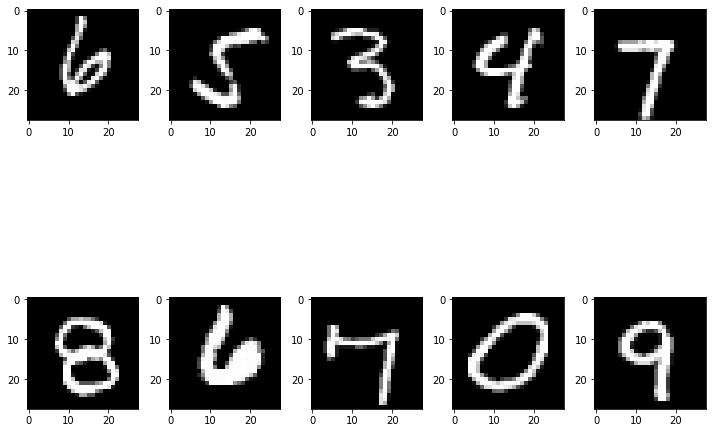

In [ ]:
# convert X_train to a numpy array reshaping the data
X_train_array = X_train.values.reshape(-1, 28, 28)
# visualize train_set images
f, ax = plt.subplots(2, 5) 
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i, j].imshow(X_train_array[k], cmap="gray")
        k += 1
plt.tight_layout()

In this code snippet, we are converting the pixel values of the images in the training dataset **from a one-dimensional array to a two-dimensional array**.

First, we extract all the pixel values from the train dataframe and store them in the X_train_image array. Then, we create an empty three-dimensional array train_ar with dimensions (28, 28, 42000), where the first two dimensions represent the height and width of the image, and the third dimension represents the number of images in the dataset.

Next, we loop through each image in the dataset and reshape it into a two-dimensional array with dimensions (28, 28). We then store this reshaped array in the train_ar array.

After processing all the images, we concatenate the train_ar array along the columns to create a single large image that contains all the training images stacked horizontally. We repeat this process for each row of images until we have a large image that contains all the training images stacked both horizontally and vertically.

Finally, we use the fromarray function from the PIL library to convert the numpy array to an image, and then use imshow function from matplotlib to display the image. The resulting plot is a visualization of all the images in the training dataset.

In [ ]:
X_train_image = train.loc[:, train.columns != 'label'].values
train_ar = np.empty((28,28,42000))

for m in range(42000):#digit
    for i in range(28):#rows
        for j in range(28):#columns
            train_ar[i][j][m] = X_train_image[m,i*28+j]
          
img_train_digits = np.empty((28,5628))
col = np.empty((28,28))
row_cnt = 0
px_cnt = 0
for m in range(42000):
    px_cnt+=1
    col = np.hstack((col, train_ar[:,:,m]))#putting 200 digits one after the other, from the left to the right
    if(px_cnt%200==0):#now I have a row of 200 digits, so I'm going to stack a row on top of the other
        if(row_cnt==0):
            img_train_digits = col
        else:
            img_train_digits = np.vstack((img_train_digits, col))#stacking rows of 200 digits until I run out of digits
        row_cnt+=1
        col = np.empty((28,28))#this is the first element of each row, I made it so I have something to start making each row. Feeling cute now, might delete late
img_train_digits = img_train_digits[:,29:]#...deleted
gr_im= Image.fromarray(img_train_digits)
plt.figure(figsize=(20, 21))
plt.imshow(gr_im)

Output hidden; open in https://colab.research.google.com to view.

The first step in the preprocessing is to scale the input data using StandardScaler. The StandardScaler scales the data to have a mean of zero and a standard deviation of one. This step is important because it can help to normalize the input data and prevent any particular feature from dominating the others, which can negatively impact the performance of the machine learning model.

The second step in the preprocessing is to encode the labels using OneHotEncoder. OneHotEncoder transforms the categorical label data into binary vectors, which can be easier for the machine learning model to handle. For example, if the original labels are numbers 0 to 9, OneHotEncoder will convert each label to a vector of length 10, with a 1 in the position corresponding to the original label and 0s in all other positions.

Note that the data is being preprocessed separately for the training and validation sets, which is important to prevent information leakage from the validation set to the training set.

In [ ]:
# Preprocess the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

encoder = OneHotEncoder()
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1)).toarray()
y_val_encoded = encoder.transform(y_val.values.reshape(-1, 1)).toarray()

In [ ]:
#print y_train before being encoded
print(y_train)
#print y_train_encoded
print(y_train_encoded)

34941    6
24433    5
24432    3
8832     4
30291    7
        ..
6265     9
11284    9
38158    2
860      6
15795    0
Name: label, Length: 33600, dtype: int64
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [ ]:
# Convert y_train_encoded to a 1-dimensional array of integers
y_train_int = y_train_encoded.argmax(axis=1)
print(y_train_int)

[6 5 3 ... 2 6 0]


In [ ]:
# Train the model
model = LogisticRegression(max_iter=2000)
model.fit(X_train_scaled, y_train_int)

LogisticRegression(max_iter=2000)

In [ ]:
# Evaluate the model
y_val_pred = model.predict(X_val_scaled)
accuracy = accuracy_score(y_val, y_val_pred)
print('Accuracy:', accuracy)

Accuracy: 0.906547619047619


In [ ]:
# Make predictions
X_test_scaled = scaler.transform(test)
y_test_pred_int = model.predict(X_test_scaled)

In [ ]:
# Convert y_test_pred_int back to a one-hot encoded array
y_test_pred_int_reshaped = np.zeros((y_test_pred_int.size, 10))
y_test_pred_int_reshaped[np.arange(y_test_pred_int.size), y_test_pred_int] = 1
y_test_pred = encoder.inverse_transform(y_test_pred_int_reshaped).flatten()


print(y_test_pred)

[2 0 5 ... 3 9 2]


In [ ]:
# Save the predictions to a CSV file
submission = pd.DataFrame({'ImageId': range(1, len(y_test_pred)+1), 'Label': y_test_pred})
submission.to_csv('submission.csv', index=False)